In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

#preparing the data
#Encoding the integer sequences present in each review of dataset into a binary matrix
import numpy as np

#defining a function to binarise/vectorise the integer reviews
#function takes no of reviews(sequences) and 10000 element in each review as I/p matrix (???)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) #creates an all zero matrix of same i/p matrix size
    for i, sequence in enumerate(sequences):        #for loop counts by enumerating over each review/sequences to check sequence/integer inside it
        results[i, sequence] = 1.                   #inside result matrix it sets specific indices corresponding to the integer/sequence inside i/sequences to 1
    return results                                  #all other indices in result will be zero => a binary matrix

x_train = vectorize_sequences(train_data)           #calling fn to binarise the train_data
x_test = vectorize_sequences(test_data)             #calling fn to binarise the test_data

y_train = np.asarray(train_labels).astype('float32')#vectorising train data/review labels
y_test = np.asarray(test_labels).astype('float32')  #vectorising test data/review labels


#building the neural network/ defining the network layers
#we use 3 Dense type layer, first 2 with o/p size 16(no of neurons) having relu fn and the last one 
#with o/p size 1 having sigmoid fn giving a probability info btwn 0 and 1 i.e, -ve and +ve review probability
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) #i/p shape is 10000 since we created the binary input with each review vector(results) having 10000 elements
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#configuring learning process with loss function-rmsprop, optimiser-bin crossentropy and metrics-accuracy
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

#setting aside validation data set for monitoring the accuracy of the model on data it has never seen before while the training is ongoing
x_val = x_train[:10000]                            #takes first 10000 sequences/reviews for validation
partial_x_train = x_train[10000:]                  #takes the remaining sequences/revies for training 

y_val = y_train[:10000]                            #takes first 10000 targets for validation
partial_y_train = y_train[10000:]                  #takes the remaining targets for training

#network training- iterate on the traning data by calling the fit method of the model
#training is done with 20 epochs/iterations over all samples in partial x&y train datas and
# in mini-batches of 512 samples at the same time training is validated by checking
#loss and accuracy on 10000 samtensorboard --logdir=my_log_dirples set aside as validation data set
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Using TensorFlow backend.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.5112 - acc: 0.7829 - val_loss: 0.3800 - val_acc: 0.8695
Epoch 2/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.2989 - acc: 0.9047 - val_loss: 0.3057 - val_acc: 0.8825
Epoch 3/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.2169 - acc: 0.9297 - val_loss: 0.2764 - val_acc: 0.8903
Epoch 4/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.1690 - acc: 0.9444 - val_loss: 0.2765 - val_acc: 0.8890
Epoch 5/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.1366 - acc: 0.9567 - val_loss: 0.2955 - val_acc: 0.8821
Epoch 6/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.1115 - acc: 0.9655 - val_loss: 0.3000 - val_acc: 0.8868
Epoch 7/20
15000/15000 [===

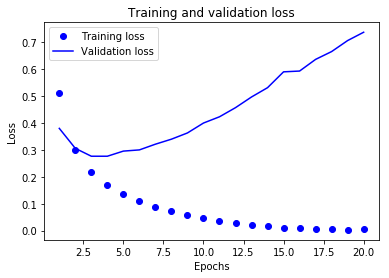

In [3]:
#Plotting training and validation loss
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

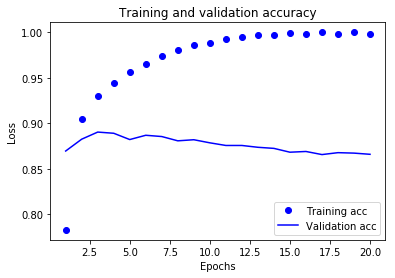

In [4]:
#plotting training and validation accuracy
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [5]:
#from above plots we can see that the validation results are not satisfactory it peaks at
#every 4th epoch. this is a case of overfitting where the training data is overoptimised
#this means after about 2nd epoch network ends up learning representations that are 
#specific to training data and dont generalise to data outside of training set
#so we retrain a model with 4 epochs to avoid overfitting
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

#evaluating the result with test data
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 2s 79us/step - loss: 0.4475 - accuracy: 0.8202
Epoch 2/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.2593 - accuracy: 0.9104
Epoch 3/4
25000/25000 [==============================] - 2s 79us/step - loss: 0.2030 - accuracy: 0.9280
Epoch 4/4
25000/25000 [==============================] - 2s 71us/step


[0.29991864953041075, 0.8810399770736694]